In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn 

In [2]:
df = pd.read_excel(r'C:/Users/Ali/Downloads/dataGYM.xlsx')
df

,Age,Height,weight,BMI,Class,Prediction
0,48,4.1,86,40,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
1,53,4.1,91,42,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
2,42,4.1,95,44,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
3,48,4.1,100,46,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
4,22,4.1,104,48,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
...,...,...,...,...,...,...
1171,50,6.9,59,14,Under weight,Under weight--protines+carbs+normal weights ->...
1172,49,6.9,64,15,Under weight,Under weight--protines+carbs+normal weights ->...
1173,52,6.9,68,16,Under weight,Under weight--protines+carbs+normal weights ->...
1174,36,6.9,73,17,Under weight,Under weight--protines+carbs+normal weights ->...


In [3]:
import matplotlib.pyplot as plt
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1176 non-null   int64  
 1   Height      1176 non-null   float64
 2   weight      1176 non-null   int64  
 3   BMI         1176 non-null   int64  
 4   Class       1176 non-null   object 
 5   Prediction  1176 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 55.2+ KB


In [4]:
def univariate_analysis(i):
    print(i.describe())
    fig, axes = plt.subplots(1,3, figsize= (16,5))
    print(axes)
    sns.distplot(i, ax=axes[0])
    b = 5
    x = pd.cut(i, bins=b ,labels= np.arange(b) )
    plt.hist(x , axes= axes[2])
    sns.boxplot(i , ax=axes[1])


count    1176.000000
mean       39.827381
std        11.912659
min        20.000000
25%        29.000000
50%        40.000000
75%        50.000000
max        60.000000
Name: Age, dtype: float64


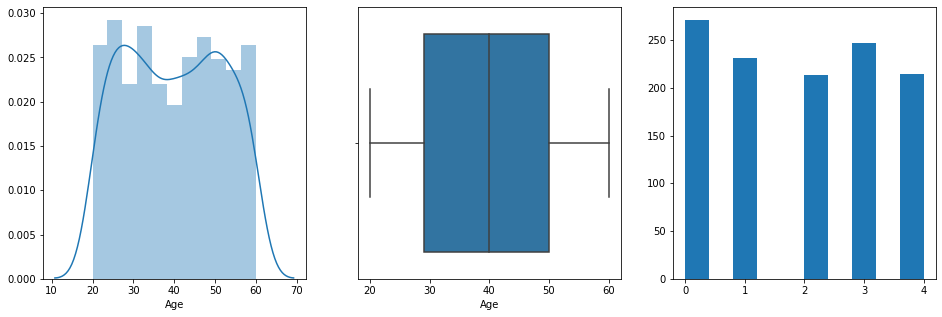

In [5]:
univariate_analysis(df['Age'])

count    1176.000000
mean        5.690017
std         0.743953
min         4.100000
25%         5.107500
50%         5.750000
75%         6.225000
max         6.900000
Name: Height, dtype: float64


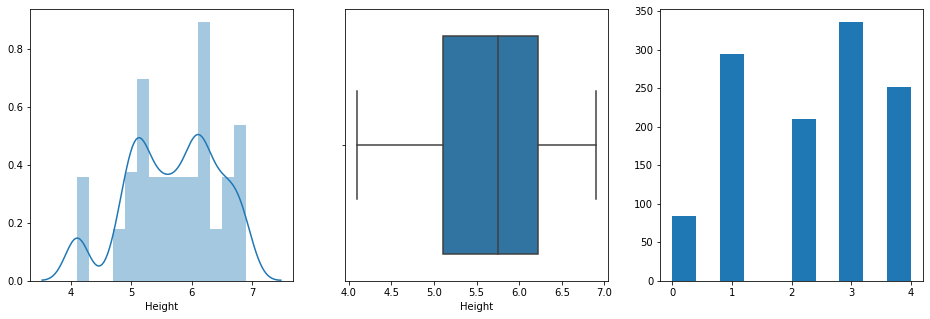

In [6]:
univariate_analysis(df['Height'])

count    1176.000000
mean       86.190476
std        27.466612
min        41.000000
25%        64.000000
50%        86.000000
75%       109.000000
max       132.000000
Name: weight, dtype: float64


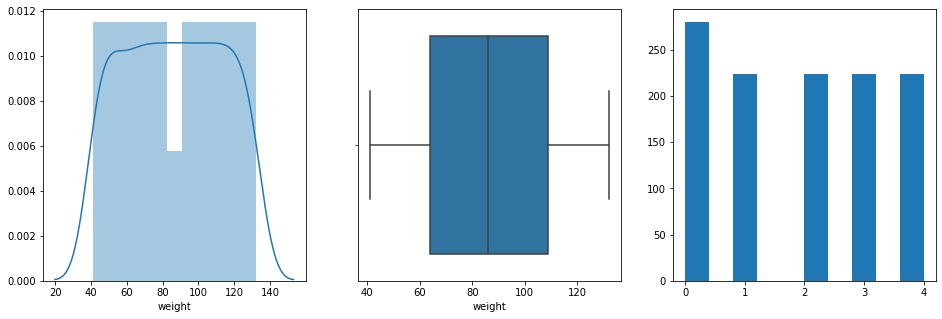

In [7]:
univariate_analysis(df['weight'])

In [8]:
df.sample(5)

,Age,Height,weight,BMI,Class,Prediction
401,59,5.3,91,35,Obese,Obese--slow lean+protine+full dite ->Overweight
479,39,5.5,64,23,Healthy,Healthy--fitness+protine+simple dite
258,37,5.1,68,22,Healthy,Healthy--fitness+protine+simple dite
599,57,5.8,73,24,Healthy,Healthy--fitness+protine+simple dite
1092,43,6.8,77,19,Healthy,Healthy--fitness+protine+simple dite


In [9]:
from collections import Counter
count = Counter(df['Class'])
print(count)
df['Class'].value_counts()

Counter({'Obese': 281, 'Under weight': 248, 'Healthy\xa0': 232, 'Extremely obese': 212, 'Overweight': 199, 'EXtremely obese': 4})


Obese              281
Under weight       248
Healthy            232
Extremely obese    212
Overweight         199
EXtremely obese      4
Name: Class, dtype: int64

In [10]:
count = Counter(df['Prediction'])
print(count)
df['Prediction'].value_counts()

Counter({'Obese--slow lean+protine+full dite ->Overweight': 281, 'Under weight--protines+carbs+normal weights ->Healthy': 248, 'Healthy--fitness+protine+simple dite': 232, 'Extremely obese--normal exercise+yoga+heavy dite control+TIPS ->Obese': 216, 'Overweight--lean+cardio+protine+normal dite ->Healthy': 199})


Obese--slow lean+protine+full dite ->Overweight                          281
Under weight--protines+carbs+normal weights ->Healthy                    248
Healthy--fitness+protine+simple dite                                     232
Extremely obese--normal exercise+yoga+heavy dite control+TIPS ->Obese    216
Overweight--lean+cardio+protine+normal dite ->Healthy                    199
Name: Prediction, dtype: int64

In [11]:
df['Class'].replace(to_replace='EXtremely obese', value='Extremely obese', inplace=True)
df['Class'].value_counts()

Obese              281
Under weight       248
Healthy            232
Extremely obese    216
Overweight         199
Name: Class, dtype: int64

In [12]:
df['Class'].size#.to_dict().keys()

1176

In [13]:
b = df['Class'].unique()
b

array(['Extremely obese', 'Healthy\xa0', 'Obese', 'Overweight',
       'Under weight'], dtype=object)

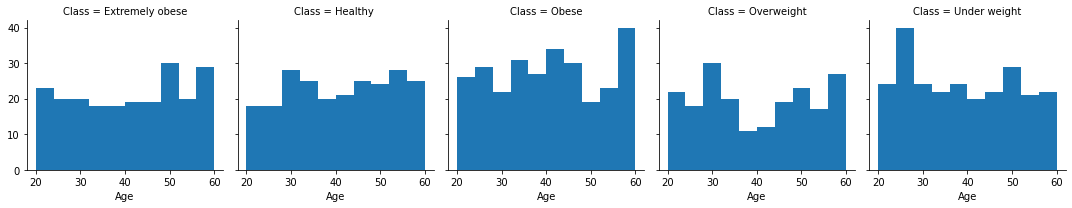

In [14]:
sns.FacetGrid(df , col='Class').map(plt.hist, 'Age')

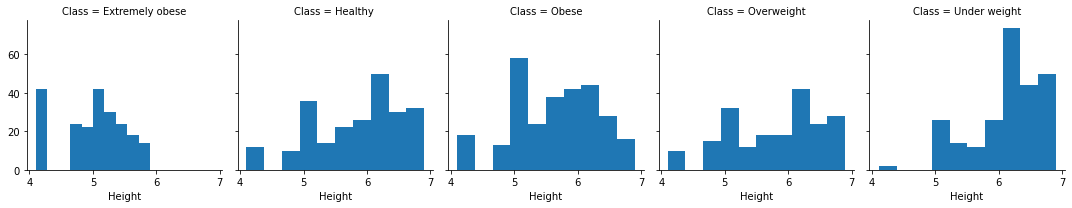

In [15]:
sns.FacetGrid(df , col='Class').map(plt.hist, 'Height')

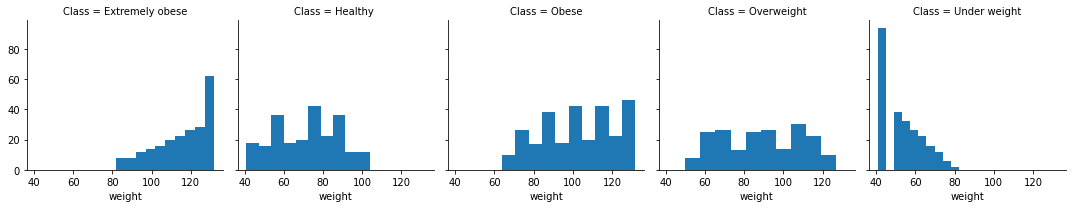

In [16]:
sns.FacetGrid(df , col='Class').map(plt.hist, 'weight')

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


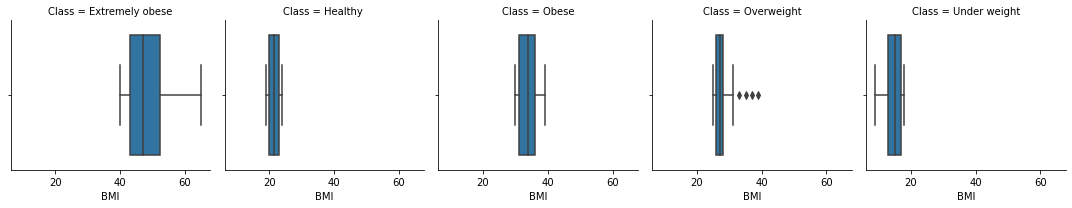

In [17]:
sns.FacetGrid(df , col='Class').map(sns.boxplot, 'BMI')

In [18]:
df.sample(5)

,Age,Height,weight,BMI,Class,Prediction
54,29,4.11,100,44,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
1123,57,6.80,64,15,Under weight,Under weight--protines+carbs+normal weights ->...
1172,49,6.90,64,15,Under weight,Under weight--protines+carbs+normal weights ->...
984,28,6.50,127,33,Obese,Obese--slow lean+protine+full dite ->Overweight
455,57,5.40,68,26,Overweight,Overweight--lean+cardio+protine+normal dite ->...


In [19]:
data = df.copy(deep=True)
del data['Class']
del data['BMI']
data

,Age,Height,weight,Prediction
0,48,4.1,86,Extremely obese--normal exercise+yoga+heavy di...
1,53,4.1,91,Extremely obese--normal exercise+yoga+heavy di...
2,42,4.1,95,Extremely obese--normal exercise+yoga+heavy di...
3,48,4.1,100,Extremely obese--normal exercise+yoga+heavy di...
4,22,4.1,104,Extremely obese--normal exercise+yoga+heavy di...
...,...,...,...,...
1171,50,6.9,59,Under weight--protines+carbs+normal weights ->...
1172,49,6.9,64,Under weight--protines+carbs+normal weights ->...
1173,52,6.9,68,Under weight--protines+carbs+normal weights ->...
1174,36,6.9,73,Under weight--protines+carbs+normal weights ->...


In [20]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]
print(X)

      Age  Height  weight
0      48     4.1      86
1      53     4.1      91
2      42     4.1      95
3      48     4.1     100
4      22     4.1     104
...   ...     ...     ...
1171   50     6.9      59
1172   49     6.9      64
1173   52     6.9      68
1174   36     6.9      73
1175   26     6.9      77

[1176 rows x 3 columns]


In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.1 , random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1058, 3)
(118, 3)
(1058,)
(118,)


# Model 1.

In [22]:
from sklearn.ensemble import RandomForestClassifier
 

In [27]:
clf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [25]:
s = y.unique()
s

array(['Extremely obese--normal exercise+yoga+heavy dite control+TIPS ->Obese',
       'Healthy--fitness+protine+simple dite',
       'Obese--slow lean+protine+full dite ->Overweight',
       'Overweight--lean+cardio+protine+normal dite ->Healthy',
       'Under weight--protines+carbs+normal weights ->Healthy'],
      dtype=object)

In [26]:
clf = RandomForestClassifier(oob_score=True , bootstrap=True,
                            n_jobs=-1 , n_estimators = 400, max_features=2 , criterion='entropy', max_depth=12 ,
                             class_weight={s[1]:2.845 , s[3]: 2.645 ,
                                           s[2]:0.734, s[0]:0.234, s[4]: 1.234},
                             
                             random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(class_weight={'Extremely obese--normal exercise+yoga+heavy dite control+TIPS ->Obese': 0.234,
                                     'Healthy--fitness+protine+simple dite': 2.845,
                                     'Obese--slow lean+protine+full dite ->Overweight': 0.734,
                                     'Overweight--lean+cardio+protine+normal dite ->Healthy': 2.645,
                                     'Under weight--protines+carbs+normal weights ->Healthy': 1.234},
                       criterion='entropy', max_depth=12, max_features=2,
                       n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=42)

In [28]:

predd = clf.predict(X_test)
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(clf.score(X_train, y_train), 
                                                                                             clf.oob_score_,
                                                                                             clf.score(X_test, y_test)))
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test , predd)
print(acc)

R^2 Training Score: 1.00 
OOB Score: 0.86 
R^2 Validation Score: 0.85
0.847457627118644


In [29]:
y.value_counts()

Obese--slow lean+protine+full dite ->Overweight                          281
Under weight--protines+carbs+normal weights ->Healthy                    248
Healthy--fitness+protine+simple dite                                     232
Extremely obese--normal exercise+yoga+heavy dite control+TIPS ->Obese    216
Overweight--lean+cardio+protine+normal dite ->Healthy                    199
Name: Prediction, dtype: int64

In [30]:
print(y_train.value_counts())
print('--------------')
print(y_test.value_counts())

Obese--slow lean+protine+full dite ->Overweight                          258
Under weight--protines+carbs+normal weights ->Healthy                    217
Healthy--fitness+protine+simple dite                                     206
Extremely obese--normal exercise+yoga+heavy dite control+TIPS ->Obese    201
Overweight--lean+cardio+protine+normal dite ->Healthy                    176
Name: Prediction, dtype: int64
--------------
Under weight--protines+carbs+normal weights ->Healthy                    31
Healthy--fitness+protine+simple dite                                     26
Overweight--lean+cardio+protine+normal dite ->Healthy                    23
Obese--slow lean+protine+full dite ->Overweight                          23
Extremely obese--normal exercise+yoga+heavy dite control+TIPS ->Obese    15
Name: Prediction, dtype: int64


In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test, predd))
metrics.confusion_matrix(y_test, predd)


                                                                       precision    recall  f1-score   support

Extremely obese--normal exercise+yoga+heavy dite control+TIPS ->Obese       0.88      0.93      0.90        15
                                 Healthy--fitness+protine+simple dite       0.79      0.73      0.76        26
                      Obese--slow lean+protine+full dite ->Overweight       0.90      0.83      0.86        23
                Overweight--lean+cardio+protine+normal dite ->Healthy       0.75      0.78      0.77        23
                Under weight--protines+carbs+normal weights ->Healthy       0.91      0.97      0.94        31

                                                             accuracy                           0.85       118
                                                            macro avg       0.85      0.85      0.85       118
                                                         weighted avg       0.85      0.85      0.85       118

array([[14,  0,  1,  0,  0],
       [ 0, 19,  0,  4,  3],
       [ 2,  0, 19,  2,  0],
       [ 0,  4,  1, 18,  0],
       [ 0,  1,  0,  0, 30]], dtype=int64)

In [32]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = clf, X = X_train,\
     y = y_train, cv = 15)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))
accuracies

Accuracy Mean 0.8440107310529846 Accuracy Variance      0.051774887610341075


array([0.90140845, 0.85915493, 0.77464789, 0.87323944, 0.87323944,
       0.8028169 , 0.85915493, 0.84507042, 0.77142857, 0.81428571,
       0.9       , 0.9       , 0.87142857, 0.88571429, 0.72857143])

In [291]:
# We don't use it ...
import pickle

pickle.dump(clf, open("Ali_GYM.pkl", "wb"))

model = pickle.load(open("Ali_GYM.pkl", "rb"))

print(model.predict([[40,5.6,70]]))


['Healthy--fitness+protine+simple dite']


In [33]:
import pickle
with open('Ali-gym-diet.pkl', 'wb') as f:
    pickle.dump(clf, f)


In [34]:
with open('Ali-gym-diet.pkl', 'rb') as f:
    clf_loaded = pickle.load(f)


In [35]:
clf_loaded

RandomForestClassifier(class_weight={'Extremely obese--normal exercise+yoga+heavy dite control+TIPS ->Obese': 0.234,
                                     'Healthy--fitness+protine+simple dite': 2.845,
                                     'Obese--slow lean+protine+full dite ->Overweight': 0.734,
                                     'Overweight--lean+cardio+protine+normal dite ->Healthy': 2.645,
                                     'Under weight--protines+carbs+normal weights ->Healthy': 1.234},
                       criterion='entropy', max_depth=12, max_features=2,
                       n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=42)

In [37]:
print(clf_loaded.predict([[20,5.9,59]]))

['Healthy--fitness+protine+simple dite']
